In [3]:
from sklearn.gaussian_process import GaussianProcessRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF

# Gaussian Processes

## Unidimensional GP

In [8]:
f=lambda x: np.sin(x)
x=np.linspace(0,10)
x_train=np.random.uniform(0,10,(15,1)) #gaussian process wants a 2D array
y_train=f(x_train)
kernel=RBF(length_scale=0.5,length_scale_bounds=(1e-5,1e8))
gp=GaussianProcessRegressor(normalize_y=False,kernel=kernel)

gp.fit(x_train,y_train)

GaussianProcessRegressor(kernel=RBF(length_scale=0.5))

C:\Users\MBBar\AppData\Local\Temp/ipykernel_13840/1517058035.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


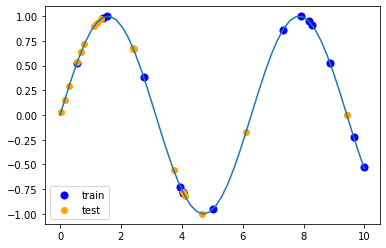

In [9]:
x_test=np.random.uniform(0,10,(20,1))
y_test=gp.predict(x_test)
fig,ax=plt.subplots()
ax.plot(x,f(x))
ax.scatter(x_train,y_train,c='b',s=50,alpha=1,label='train')
ax.scatter(x_test,y_test,c='orange',alpha=1,label='test')
ax.legend()
fig.show()

## Two dimensional GP

In [12]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#f=lambda x: np.sin(x[0])*np.cos(x[1])
f = lambda x: x[0]*x[1]
X=np.mgrid[-5:5:50j,-5:5:50j]
Y = f(X)
n_train = 50
x_train=np.random.uniform(-5,5,(n_train,2)) #gaussian process wants a 2D array
x_train = np.append(x_train,np.array([[5,5],[5,-5],[-5,5],[-5,-5]]),axis=0)
y_train=f(x_train.T)
kernel=RBF(length_scale=0.5,length_scale_bounds=(1e-5,1e8))
gp=GaussianProcessRegressor(kernel=kernel)
gp.fit(x_train,y_train)
n_test = 1000
x_test=np.random.uniform(-5,5,(n_test,2))
y_test=gp.predict(x_test)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X[0], X[1], Y,alpha=0.3,cmap='viridis')
ax.scatter3D(x_train[:,0],x_train[:,1],y_train,c='orange')
ax.scatter3D(x_test[:,0],x_test[:,1],y_test,c='blue')
fig.show()

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x_test[:,0],x_test[:,1],np.log10(np.abs(y_test-f(x_test.T))),c='red')
fig.show()

# 3D GP

C:\Users\MBBar\AppData\Local\Temp/ipykernel_5384/2437874251.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


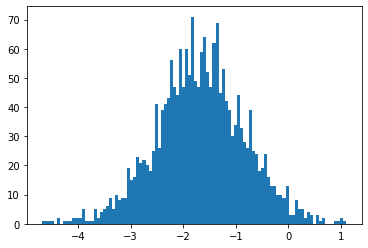

In [7]:
f = lambda x: x[:,0]*x[:,1]*x[:,2]
n_train = 2000
x_train=np.random.uniform(-5,5,(n_train,3)) 
y_train=f(x_train)
kernel=RBF(length_scale=1,length_scale_bounds=(1e-5,1e8))
gp=GaussianProcessRegressor(kernel=kernel)
gp.fit(x_train,y_train)
n_test = 2000
x_test=np.random.uniform(-5,5,(n_test,3))
y_test=gp.predict(x_test)

fig,ax=plt.subplots()
ax.hist(np.log10(np.abs(y_test-f(x_test))),bins=100)
fig.show()

array([ 2.97991034e-01,  2.04029016e+00,  7.85003390e+00, -1.83695672e+00,
        5.10021010e+00,  3.24437923e+00, -2.41492583e+00, -1.19237370e+00,
       -1.87744030e+01,  5.89030828e+00, -3.20852228e+00,  4.11873925e+00,
       -1.57867767e+00,  1.17612371e+00,  1.62325934e+01, -3.80619809e+00,
       -1.12840143e+01, -9.55501098e+00, -2.74898064e+00,  2.22445103e+00,
       -2.42442555e+01,  5.11858328e+00, -3.24888158e-01, -4.68259537e-01,
       -1.88433681e+01, -1.94077082e+01, -1.65366418e+00, -5.62224045e+00,
       -2.40370569e+00,  1.03575440e+01, -1.45827084e+00,  6.77232557e+00,
       -2.00783361e+00, -8.26229802e-01,  2.85733894e+01, -1.01449513e+00,
       -2.12720134e+00, -4.37894508e+00, -8.64710990e-01, -1.13435521e+00,
        1.56137482e+01, -1.37919019e+00, -1.03031932e+01, -1.04628560e+01,
       -1.84087588e+00,  5.85731745e-01,  2.26692193e+00,  1.83948994e+01,
        3.79360486e-01,  9.22503295e+00,  3.79957285e+01,  4.90573029e-02,
        7.69327518e+00,  